In [0]:
import pandas as pd

In [0]:
# disable "scientific notation"
# display 1.1924331e+03 as 1192.43 in Pandas context
pd.options.display.float_format = '{:.2f}'.format

# IDMC displacement data
from http://www.internal-displacement.org/database/displacement-data

In [4]:
url = 'https://raw.githubusercontent.com/ReDI-School/python-data-science/master/datasets/idmc/idmc_displacement_all_dataset.csv'
idmc_displacement_all = pd.read_csv(url)
idmc_displacement_all.head(10)

,ISO3,Name,Year,Conflict Stock Displacement,Conflict New Displacements,Disaster New Displacements
0,AB9,Abyei Area,2014,20000.00,nan,nan
1,AB9,Abyei Area,2015,82000.00,nan,nan
2,AB9,Abyei Area,2016,20000.00,nan,nan
3,AB9,Abyei Area,2017,31000.00,nan,nan
4,AFG,Afghanistan,2008,nan,nan,3400.00
5,AFG,Afghanistan,2009,297000.00,nan,28000.00
6,AFG,Afghanistan,2010,352000.00,102000.00,71000.00
7,AFG,Afghanistan,2011,450000.00,186000.00,3000.00
8,AFG,Afghanistan,2012,492000.00,100000.00,30000.00
9,AFG,Afghanistan,2013,631000.00,124000.00,15000.00


In [9]:
idmc_displacement_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 6 columns):
ISO3                           1251 non-null object
Name                           1248 non-null object
Year                           1251 non-null int64
Conflict Stock Displacement    463 non-null float64
Conflict New Displacements     248 non-null float64
Disaster New Displacements     941 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 58.7+ KB


We wonder about all the `nan`s. It is weird that there is no conflict data in 2009 for Afghanistan even though we know the conflict was already going on then.

Sometimes even the name is `nan`:

In [5]:
idmc_displacement_all[idmc_displacement_all.Name.isnull()]

,ISO3,Name,Year,Conflict Stock Displacement,Conflict New Displacements,Disaster New Displacements
740,MTQ,NaN,2011,nan,nan,nan
1073,TKL,NaN,2011,nan,nan,nan
1180,VGB,NaN,2017,nan,nan,6000.00


We found one country that has a row but no data:

In [6]:
idmc_displacement_all[idmc_displacement_all.ISO3 == 'ASM']

,ISO3,Name,Year,Conflict Stock Displacement,Conflict New Displacements,Disaster New Displacements
51,ASM,American Samoa,2009,nan,nan,nan


We check that each row contains data for one country in a specific year:

In [13]:
x = displacements.groupby(['Name', 'Year']).size()
len(x[x > 1])

0

Here we see that not all contries have equally many years defined:

In [7]:
idmc_displacement_all.ISO3.value_counts()

CHL    10
TUR    10
BGD    10
AFG    10
COL    10
CHN    10
MDG    10
BRA    10
CAF    10
PAN    10
USA    10
ETH    10
DOM    10
GTM    10
NIC    10
PER    10
PHL    10
ARG    10
MLI    10
IDN    10
UGA    10
TCD    10
SOM    10
MYS    10
LAO    10
ZAF    10
DZA    10
MOZ    10
KEN    10
PAK    10
       ..
MDA     2
SWE     2
PYF     2
POL     2
MHL     2
SUR     2
GNB     2
TCA     2
KIR     2
BRB     2
PLW     2
MDV     1
CYM     1
LTU     1
SVK     1
ISL     1
ARE     1
PRI     1
MAF     1
MTQ     1
TUV     1
TKL     1
VGB     1
GRD     1
ASM     1
AIA     1
KNA     1
GRL     1
VIR     1
SXM     1
Name: ISO3, Length: 192, dtype: int64

In [8]:
# In our project, we want to get the indicators for displacements.
# Therefore we only need to look at new displacements (and the indicator values at the time when they happened).
# Hence, we can discard stock displacements.

displacements = idmc_displacement_all.drop('Conflict Stock Displacement', axis=1)
displacements.head()

,ISO3,Name,Year,Conflict New Displacements,Disaster New Displacements
0,AB9,Abyei Area,2014,nan,nan
1,AB9,Abyei Area,2015,nan,nan
2,AB9,Abyei Area,2016,nan,nan
3,AB9,Abyei Area,2017,nan,nan
4,AFG,Afghanistan,2008,nan,3400.00


Next we look at distributions of new displacements:

count       248.00
mean     266937.06
std      497176.90
min           2.00
25%       11500.00
50%       97000.00
75%      282250.00
max     3500000.00
Name: Conflict New Displacements, dtype: float64


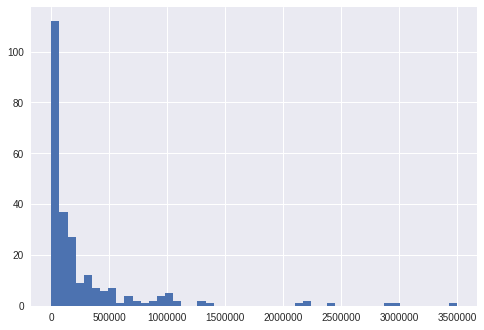

In [15]:
conflict_displacements = displacements['Conflict New Displacements']
print(conflict_displacements.describe())
conflict_displacements.hist(bins=50)

count        941.00
mean      261870.49
std      1194235.81
min            2.00
25%         1200.00
50%         9000.00
75%        54000.00
max     18660000.00
Name: Disaster New Displacements, dtype: float64


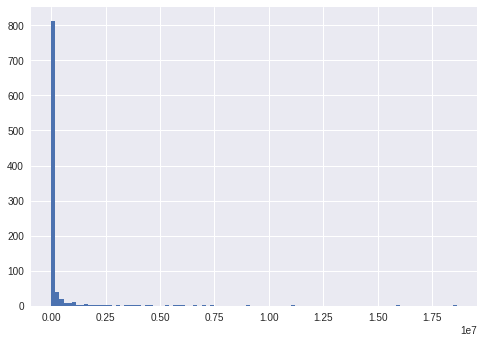

In [16]:
disaster_displacements = displacements['Disaster New Displacements']
print(disaster_displacements.describe())
disaster_displacements.hist(bins=100)

Now we check the total number of new displacements in the dataset by country:

In [12]:
displacements.groupby('ISO3')['Conflict New Displacements'].sum().sort_values(ascending=False).head(10)

ISO3
SYR   12191000.00
COD    8280000.00
IRQ    5349000.00
PAK    5126400.00
YEM    3566000.00
SSD    3564000.00
NGA    3101000.00
SDN    2921000.00
PHL    2409000.00
AFG    2130000.00
Name: Conflict New Displacements, dtype: float64

In [13]:
displacements.groupby('ISO3')['Disaster New Displacements'].sum().sort_values(ascending=False).head(10)

ISO3
CHN   73877000.00
IND   36964000.00
PHL   35668000.00
PAK   15584800.00
NGA    7238300.00
BGD    6817000.00
USA    6052300.00
MMR    5227500.00
IDN    4780400.00
CUB    4185000.00
Name: Disaster New Displacements, dtype: float64

At first the year distribution looks uniform:

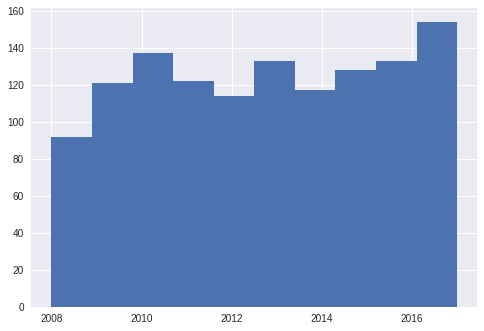

In [9]:
displacements['Year'].hist()

When looking at the total new displacements by year, we see that there is no conflict related data for 2008.

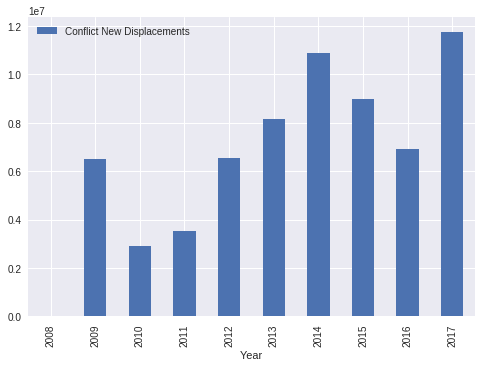

In [19]:
displacements.groupby('Year')['Conflict New Displacements'].sum().sort_index().reset_index().plot.bar(x='Year')

We do see new displacements for all years related to disasters:

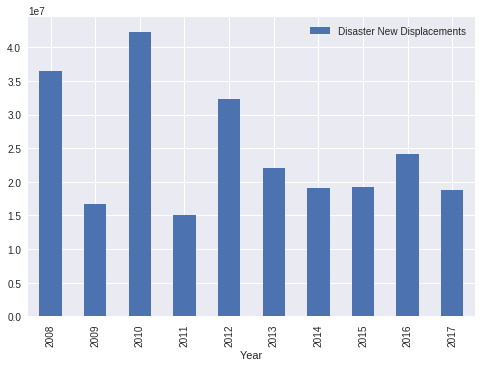

In [20]:
displacements.groupby('Year')['Disaster New Displacements'].sum().sort_index().reset_index().plot.bar(x='Year')

# World Bank data

In [22]:
!pip install pandas-datareader

    100% |████████████████████████████████| 112kB 2.5MB/s 
    100% |████████████████████████████████| 5.8MB 5.0MB/s 


In [0]:
from pandas_datareader import wb

Check countries data that is available in the World Bank API:

In [24]:
countries = wb.get_countries()
print("number of countries:", len(countries))
countries.head()

number of countries: 304


,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
0,,Oranjestad,ABW,High income,AW,12.52,Not classified,-70.02,Aruba,Latin America & Caribbean
1,South Asia,Kabul,AFG,Low income,AF,34.52,IDA,69.18,Afghanistan,South Asia
2,,,AFR,Aggregates,A9,nan,Aggregates,nan,Africa,Aggregates
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Lower middle income,AO,-8.81,IBRD,13.24,Angola,Sub-Saharan Africa
4,Europe & Central Asia (excluding high income),Tirane,ALB,Upper middle income,AL,41.33,IBRD,19.82,Albania,Europe & Central Asia


Check the list of indicators that are available in the World Bank API:

In [48]:
indicators = wb.get_indicators()
print("number of indicators:", len(indicators))
indicators.head()

number of indicators: 16712


,id,name,source,sourceNote,sourceOrganization,topics,unit
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty,
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty,
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty,
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of data from Nati...,Poverty,
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty,


In [26]:
indicators.topics.value_counts().head(20)

                                      9892
Social Protection & Labor             3201
Education                             1404
Health                                 537
Economy & Growth                       200
External Debt                          198
Financial Sector                       162
Poverty                                129
Gender                                 122
Private Sector ; Trade                 103
Public Sector                           78
Education  ; Gender                     65
Aid Effectiveness                       53
Infrastructure                          45
Private Sector                          42
Social Protection & Labor ; Gender      36
Climate Change ; Environment            29
Health  ; Gender                        28
Millenium development goals             26
Economy & Growth ; Trade                26
Name: topics, dtype: int64